## Import Libraries

In [25]:
import pandas as pd
import geopandas as gpd
import plotly.express as px
import json

## Define methods

In [26]:

types = []
def check_types(obj):
  obj_type = type(obj)
  if(obj_type not in types):
    types.append(obj_type)

def check_series_types(series, col):
  global types
  types = []
  series[col].apply(check_types)
  return types

def prepare_district_names(district):
  if('CIC' in district or 'CIDADE INDUSTRIAL' in district):
    return 'CIDADE INDUSTRIAL DE CURITIBA'
  elif('BOQUEIRÃO ' in district):
    print(district)
    return 'BOQUEIRÃO'
  else:
    return district

## Read SiGesGuarda Data

In [61]:
df = pd.read_csv('./sigesguarda_cleaned.csv')
print('Records: ', df.shape[0], ' Features: ', df.shape[1])
df.head()

Records:  389964  Features:  35


C:\Users\Radek\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning:

Columns (15,19,20,33) have mixed types.Specify dtype option on import or set low_memory=False.



ATENDIMENTO_ANO        ATENDIMENTO_BAIRRO_NOME  \
0             2009  CIDADE INDUSTRIAL DE CURITIBA   
1             2009                     FAZENDINHA   
2             2009                        UBERABA   
3             2009                  SÍTIO CERCADO   
4             2009                      TATUQUARA   

                EQUIPAMENTO_URBANO_NOME FLAG_EQUIPAMENTO_URBANO  \
0                                   NaN                     NÃO   
1                  BOSQUE DA FAZENDINHA                     SIM   
2                                   NaN                     NÃO   
3                                   NaN                     NÃO   
4  CENTRO DE ESPORTE E LAZER SANTA RITA                     SIM   

  FLAG_FLAGRANTE                   LOGRADOURO_NOME  NATUREZA1_DEFESA_CIVIL  \
0            NÃO              DAVI XAVIER DA SILVA                       0   
1            NÃO                     CARLOS KLEMTZ                       0   
2            NÃO  DOUTOR JOÃO DE PAULA MOURA BRITO                       0   
3            NÃO  EDGARD CAVALCANTI DE ALBUQUERQUE                       0   
4            NÃO            CARLOS MUNHOZ DA ROCHA                       0   

  NATUREZA1_DESCRICAO  NATUREZA2_DEFESA_CIVIL NATUREZA2_DESCRICAO  ...  \
0             Alarmes                     NaN                 NaN  ...   
1               Roubo                     NaN                 NaN  ...   
2             Animais                     NaN                 NaN  ...   
3             Animais                     NaN                 NaN  ...   
4             Alarmes                     NaN                 NaN  ...   

   OCORRENCIA_HORA OCORRENCIA_MES  OPERACAO_DESCRICAO  \
0         15:14:00              1                 NaN   
1         15:22:00              1                 NaN   
2         15:59:00              1                 NaN   
3         16:13:00              1                 NaN   
4         16:29:00              1                 NaN   

      ORIGEM_CHAMADO_DESCRICAO  REGIONAL_FATO_NOME  \
0  NÃO CADASTRAR "ANTIGO SIGA"                 CIC   
1                          153              PORTÃO   
2                          156              CAJURU   
3                          156         BAIRRO NOVO   
4  NÃO CADASTRAR "ANTIGO SIGA"         PINHEIRINHO   

                      SECRETARIA_NOME SECRETARIA_SIGLA SERVICO_NOME  \
0             FUNDAÇÃO DE AÇÃO SOCIAL              FAS         SIGA   
1  SECRETARIA MUNICIPAL MEIO AMBIENTE             SMMA       NORMAL   
2       SECRETARIA MUNICIPAL DA SAÚDE              SMS        SACAF   
3       SECRETARIA MUNICIPAL DA SAÚDE              SMS        SACAF   
4             FUNDAÇÃO DE AÇÃO SOCIAL              FAS         SIGA   

  SITUACAO_EQUIPE_DESCRICAO NUMERO_PROTOCOLO_156  
0                       NaN                  NaN  
1                       NaN                  NaN  
2                       NaN            2640856.0  
3                       NaN            2640854.0  
4                       NaN                  NaN  

[5 rows x 35 columns]

In [29]:
for col in df.columns:
  print(f'{col}: ', check_series_types(df,col))

ATENDIMENTO_ANO:  [<class 'int'>]
ATENDIMENTO_BAIRRO_NOME:  [<class 'str'>]
EQUIPAMENTO_URBANO_NOME:  [<class 'float'>, <class 'str'>]
FLAG_EQUIPAMENTO_URBANO:  [<class 'str'>]
FLAG_FLAGRANTE:  [<class 'str'>]
LOGRADOURO_NOME:  [<class 'str'>]
NATUREZA1_DEFESA_CIVIL:  [<class 'str'>, <class 'int'>]
NATUREZA1_DESCRICAO:  [<class 'str'>]
NATUREZA2_DEFESA_CIVIL:  [<class 'float'>, <class 'str'>]
NATUREZA2_DESCRICAO:  [<class 'float'>, <class 'str'>]
NATUREZA3_DEFESA_CIVIL:  [<class 'float'>, <class 'str'>]
NATUREZA3_DESCRICAO:  [<class 'float'>, <class 'str'>]
NATUREZA4_DEFESA_CIVIL:  [<class 'float'>, <class 'str'>]
NATUREZA4_DESCRICAO:  [<class 'float'>, <class 'str'>]
NATUREZA5_DEFESA_CIVIL:  [<class 'float'>, <class 'str'>]
NATUREZA5_DESCRICAO:  [<class 'float'>, <class 'str'>]
SUBCATEGORIA1_DESCRICAO:  [<class 'str'>, <class 'float'>]
SUBCATEGORIA2_DESCRICAO:  [<class 'float'>, <class 'str'>]
SUBCATEGORIA3_DESCRICAO:  [<class 'float'>, <class 'str'>]
SUBCATEGORIA4_DESCRICAO:  [<class

## Read Districts GeoJSON Data

<AxesSubplot:>

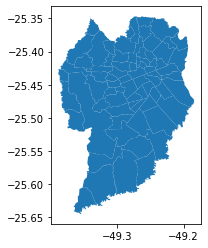

In [71]:
f = open('./divisa_bairros_cleaned.geojson', encoding='utf-8')

bairros_geojson = json.load(f)

f.close()

gpd.GeoDataFrame.from_features(bairros_geojson['features']).plot()

## Crimes temporal series

In [62]:
crimes_per_year = df[['ATENDIMENTO_ANO','NATUREZA1_DESCRICAO']].value_counts().reset_index().sort_values(by='ATENDIMENTO_ANO')
fig = px.line(pd.DataFrame(dict(x=crimes_per_year['ATENDIMENTO_ANO'], y = crimes_per_year[0], color = crimes_per_year['NATUREZA1_DESCRICAO'])).sort_values(by='x'),x='x',y='y',color='color')
fig.show()

## All time crimes map

In [68]:
ocorrencias_bairro = df['ATENDIMENTO_BAIRRO_NOME'].value_counts().to_frame().reset_index().rename(columns={'ATENDIMENTO_BAIRRO_NOME': 'OCORRENCIAS', 'index': 'NOME'})

fig = px.choropleth_mapbox(ocorrencias_bairro, geojson=bairros_geojson, color="OCORRENCIAS",
                           locations="NOME", featureidkey="properties.NOME",
                           center={"lat": -25.459717, "lon": -49.278820},
                           mapbox_style="carto-positron", zoom=9)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()